# Laboratorio 5
## Parte 2
---

Se importa libreria y se lee el archivo

In [108]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [109]:
Trdf = pd.read_csv('Train_data.csv')
Trdf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [110]:
Trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

El dataset no se encuentra desbalanceado

In [111]:
Trdf['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

Graficando, posiblemente hayan datos atipicos

{'whiskers': [<matplotlib.lines.Line2D at 0x1e625a83fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e625a93610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e625a83c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1e625a93d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e625a9f100>],
 'means': []}

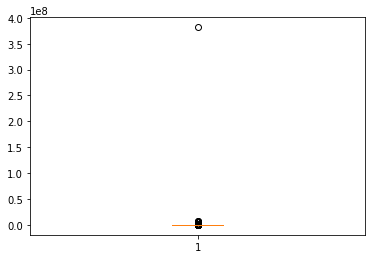

In [112]:
plt.boxplot(Trdf['src_bytes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e625af5af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e625b03280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e625af5760>],
 'medians': [<matplotlib.lines.Line2D at 0x1e625b039a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e625b03d30>],
 'means': []}

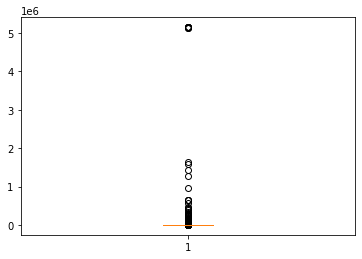

In [113]:
plt.boxplot(Trdf["dst_bytes"])

Registros

In [114]:
len(Trdf)

25192

Quitando datos atipicos

In [115]:
def atipico(Trdf, ft):
    Q1 = Trdf[ft].quantile(0.0)
    Q3 = Trdf[ft].quantile(0.95)
    IQR = Q3 - Q1
    limiteSuperior = Q3 + 1.5 * IQR
    limiteInferior = Q1 - 1.5 * IQR
    return limiteSuperior, limiteInferior

upper, lower = atipico(Trdf, "src_bytes")
Trdf = Trdf[(Trdf['src_bytes'] > lower) & (Trdf['src_bytes'] < upper)]

upper, lower = atipico(Trdf, "dst_bytes")
Trdf = Trdf[(Trdf['dst_bytes'] > lower) & (Trdf['dst_bytes'] < upper)]



Nuevos registros

In [116]:
len(Trdf)

24127

Volvemos a verlo, y ya no estan

{'whiskers': [<matplotlib.lines.Line2D at 0x1e625b4abb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e625b59310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e625b4a820>],
 'medians': [<matplotlib.lines.Line2D at 0x1e625b59a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e625b59dc0>],
 'means': []}

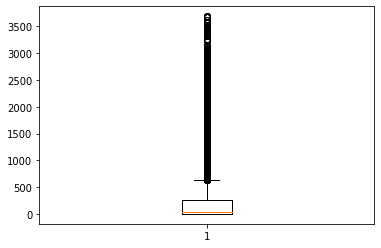

In [117]:
plt.boxplot(Trdf["src_bytes"])

importamos

In [118]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn.decomposition import PCA

Categorico a cuantitativo

In [119]:
le = LabelEncoder()
Trdf['service'] = le.fit_transform(Trdf['service'])
Trdf['protocol_type'] = le.fit_transform(Trdf['protocol_type'])
Trdf['flag'] = le.fit_transform(Trdf['flag'])
Trdf['class'] = le.fit_transform(Trdf['class'])

In [120]:
Trdf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [121]:
features = Trdf.loc[:, Trdf.columns != 'class']
target = Trdf["class"]

Escalando datos

In [122]:
scaler = MinMaxScaler()
scaler.fit(features)
features = pd.DataFrame(scaler.transform(features))
features

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.5,0.292308,0.9,0.133062,0.000000,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.630769,0.9,0.039566,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.707692,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.338462,0.9,0.062873,0.409966,0.0,0.0,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.338462,0.9,0.053930,0.021119,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24122,0.0,0.5,0.246154,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.027451,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
24123,0.0,0.5,0.292308,0.9,0.090515,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.152941,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
24124,0.0,0.5,0.707692,0.1,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.050980,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
24125,0.0,0.5,0.584615,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.078431,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [123]:
f_train, f_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1234)
knn = KNeighborsClassifier()
knn.fit(f_train, target_train)

KNeighborsClassifier()

Accuracy, predecimos si hay overfit

In [124]:
predict_train = knn.predict(f_train)
print(metrics.accuracy_score(predict_train, target_train))

0.9952629085741355


In [125]:
predict_test = knn.predict(f_test)
print(metrics.accuracy_score(predict_test, target_test))

0.9944743749136621


In [126]:
print(classification_report(predict_test, target_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3466
           1       0.99      0.99      0.99      3773

    accuracy                           0.99      7239
   macro avg       0.99      0.99      0.99      7239
weighted avg       0.99      0.99      0.99      7239



no hay overfit

### Modelo con PCA

In [127]:
pca = PCA(n_components=0.50, random_state=255)
pca.fit(f_train)
pca.fit(f_test)
pca.n_components_

2

In [129]:
traindf_trainPCA = pca.transform(f_train)
traindf_testPCA = pca.transform(f_test)
traindf_trainPCA

array([[-1.05474102, -0.39581106],
       [ 1.62679751, -0.43904849],
       [ 1.33008882,  0.81138336],
       ...,
       [ 0.37311853,  2.07345503],
       [ 1.73126287, -0.37925494],
       [-0.5832992 , -0.10204449]])

In [130]:
knn_PCA = KNeighborsClassifier()
knn_PCA.fit(traindf_trainPCA, target_train)

KNeighborsClassifier()

In [135]:
y_predict = knn_PCA.predict(traindf_testPCA)
print(classification_report(predict_test,target_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3473
           1       0.97      0.97      0.97      3766

    accuracy                           0.97      7239
   macro avg       0.97      0.97      0.97      7239
weighted avg       0.97      0.97      0.97      7239



Predecimos si no hay overit con train y test

In [136]:
predict_train = knn_PCA.predict(traindf_trainPCA)
print(metrics.accuracy_score(predict_train, target_train))


predict_test = knn_PCA.predict(traindf_testPCA)
print(metrics.accuracy_score(predict_test, target_test))

0.9777356702984368
0.9669843901091311


In [137]:
print(metrics.confusion_matrix(predict_test, target_test))

[[3350  123]
 [ 116 3650]]


# Resultados

Se puede observar que en ambos modelos se tiene resultados aceptables, aaunque parece que es mejor el modelo de Naive bayes, en el primero tiene un accuracy de 0.99 y el segundo tiene 0.97, de igual manera  se puede ver en precision y recall

# Conclusiones

Con lo visto en los resultados podemos decir que es mejor utilizar el primer modelo ya que solo se puede ver que en lo que ayuda PCA es con la velocidad pero si se quieren tener mejor presicion es mejor tener el otro modelo